In [1]:
%reset -f

In [2]:
import sys, os
sys.path.append(os.path.dirname(os.path.realpath('../utils')))
import numpy as np
from utils.aiwt import cjkfun

In [3]:
J = 15
j0 = 0

a = 0
b = 2
Re = 1000

deltax = (b-a)/(2**J)
XJ0 = np.arange(a, b+deltax, deltax).reshape(1,-1)
V0 = np.sin(np.pi * XJ0)

M = 1
CC = 1

t = 0.4
tao = 0.001

eps0 = 0.005
window = 3

same = np.inf

nn_dict = {1:[1,'0.01'], 400:[3,'0.4'], 600:[5,'0.6'], 800:[1,'0.8'],
           1200:[3,'1.2'], 600:[5,'1.6'], 2000:[1,'2.0'], 2400:[3,'2.4'],
           2600:[5,'2.6'], 2800:[1,'2.8'], 3000:[3,'3.0'], 3200:[5,'3.2']}
cjk, cjknum, zJc, zJcnum = cjkfun(V0, J, j0, a, b, eps0)

In [4]:
gJc = zJc.copy()
gjk = cjk.copy()
gjknum = cjknum.copy()
for j in range(J):
    wt_1 = cjk[j]
    position_x = (2**J)/2**(j+1) * (2*wt_1 + 1)
    position_neighbor_len = (2**J)/2**(j+2)
    position_left_neighbor = position_x - position_neighbor_len
    position_right_neighbor = position_x + position_neighbor_len
    position_neighbor = np.append(position_left_neighbor, position_right_neighbor, axis=0)
    position_neighbor = np.sort(position_neighbor)
    gJc = np.union1d(gJc, position_neighbor)
    
    k = np.arange(2**(j+1))
    position_k = (2**J)/2**(j+2) * (2*k + 1)
    new_position = np.where(np.in1d(position_k, position_neighbor))[0]
    if j+2 > len(gjk):
        gjk.append(new_position)
        gjknum[j+1] = gjk[j+1].shape[0]
        break
    else:
        gjk[j+1] = np.union1d(gjk[j+1], new_position)
        gjknum[j+1] = gjk[j+1].shape[0]
gJcnum = len(gJc)

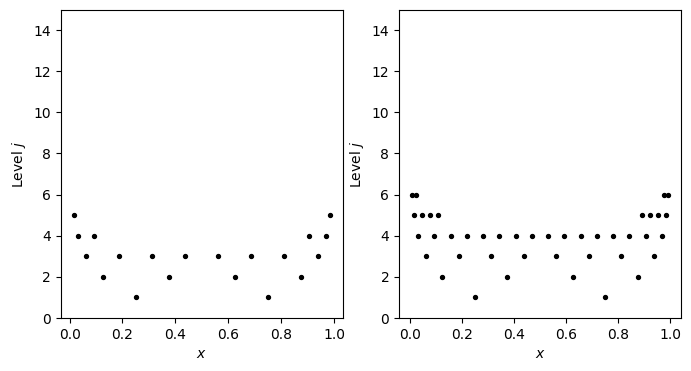

In [9]:
from matplotlib import pyplot as plt 
fig, axs = plt.subplots(1, 2, figsize=(8,4))
def DrawCollocationPoint(ax, cjk,cjknum,a,b,j0,J):
    for j in range(j0, J):
        deltax = (b - a) / 2 ** (j+1)
        k = np.arange(cjknum[j])
        if(k.shape[0]==0):
            continue
        Y1 = np.zeros(k.shape[0]) + j
        X1 = (0.5 + cjk[j]) * deltax
        ax.scatter(X1, Y1, s=8, c='k')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'Level $j$')
    ax.set_ylim([0, J])
DrawCollocationPoint(axs[0], cjk, cjknum,a,b,j0,J)
DrawCollocationPoint(axs[1], gjk, gjknum,a,b,j0,J)